# Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialgraphs2025/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 30th, 2025 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via DTU Learn

# Assignment 1.1: Exploring WS and BA models

This first part draws on the Watts-Stogatz and Barabasi-Albert models from Week 3. You should provide solutions to the exercises with the following titles from **Part 1** 

* *Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook*


<span style="color:#4DA6FF">

* **What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?**

A problem with random networks as a model for real-world networks, according to section 3.5, is that in a large random network, the degree of most nodes is close to the average degree (‹k›), while in real-world networks, node degrees can vary much more widely.

The degree of a node in a network refers to the number of links it has to other nodes. In large random networks, node degrees follow a Poisson distribution, with a peak at ‹k›. This means that most nodes have degrees close to ‹k›, so the variability in node degrees is relatively small. In contrast, real-world networks often include nodes with very high degrees and others with very low degrees. For example, in a social network, some individuals may be highly connected, while others are more isolated.

* **List the four regimes that characterize random networks as a function of $\langle k \rangle$.**

Four different regimes can be distinguished in a random network as $\langle k \rangle$ changes:

1.	Subcritical regime: $0 < \langle k \rangle < 1$.
If $\langle k \rangle = 0$, all nodes in the network are isolated. As $\langle k \rangle$ increases (but remains below 1), small clusters begin to form, but not all nodes are connected. Therefore, in this regime, we only observe small, disconnected clusters.

2.	Critical regime: $\langle k \rangle = 1$.
This is the critical point that separates the regime without a giant component from the one where a giant component emerges. At this point, clusters are still too small to be considered a true giant component.

3.	Supercritical regime: $\langle k \rangle > 1$.
In this regime, a giant component exists. The further $\langle k \rangle$ increases above 1, the larger this giant component becomes. It coexists with other small, isolated components. This regime is the most relevant for modeling real systems.

4.	Connected regime: $\langle k \rangle > \ln N$.
In this regime, almost all nodes are connected, forming a single connected network. As $\langle k \rangle$ increases further, the network becomes denser, and it turns into a complete graph only when $\langle k \rangle = N - 1$.

In summary, the random network model shows that network formation is not gradual. For small ‹k› we see isolated nodes and small clusters, but at a critical point they suddenly start merging into a giant component.

* **According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?**

In random networks, the clustering coefficient is independent of a node’s degree, and the average clustering coefficient $\langle C \rangle$ scales as $1/N$, meaning it becomes very small for large networks.  In contrast, in real-world networks the average clustering coefficient is largely independent of $N$, and remains much higher than what a random network with the same $N$ and $L$ would predict. Moreover, in real networks, the clustering coefficient is dependent of a node's degree, decreasing as $k$ increases. 

This is a problem because it shows that random networks cannot reproduce the high clustering structure observed in real-world systems, making them a poor model for real networks.

</span>


* *WS edition*

<span style="color:#4DA6FF">

* **First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one.**

</span>


In [1]:
# import libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

Average shortest path length for WS graph with p=0: 62.875751503006015
Average shortest path length for WS graph with p=0.1: 8.031503006012024
Average shortest path length for WS graph with p=1: 4.757234468937876


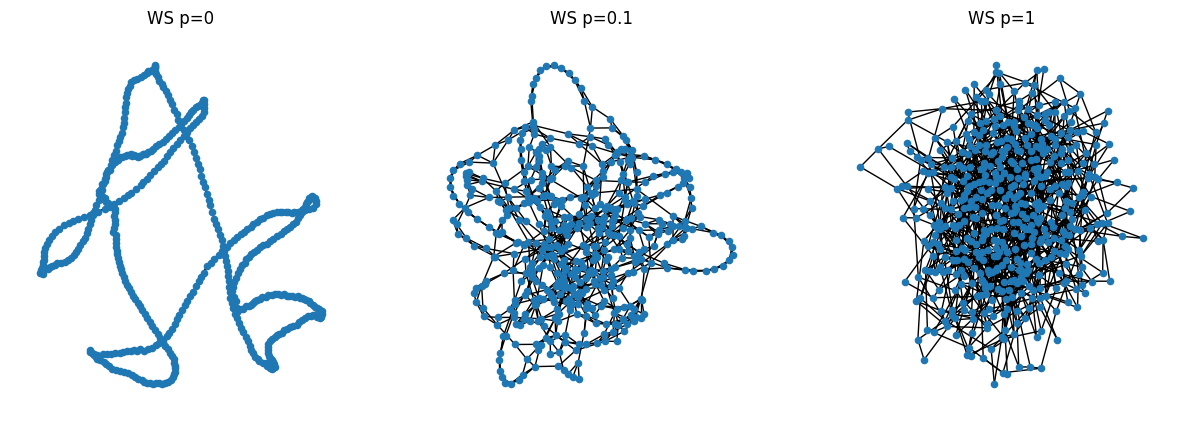

In [11]:
N = 500 # number of nodes
avg_degree = 4 # average degree

WS0 = nx.watts_strogatz_graph(N, avg_degree, 0) #WS model with p=0
WS01 = nx.watts_strogatz_graph(N, avg_degree, 0.1) #WS model with p=0.1
WS1 = nx.watts_strogatz_graph(N, avg_degree, 1) #WS model with p=1

# compute the average shortest path length for each WS graph
avg_path_length0 = nx.average_shortest_path_length(WS0)
avg_path_length01 = nx.average_shortest_path_length(WS01)
avg_path_length1 = nx.average_shortest_path_length(WS1)

print("Average shortest path length for WS graph with p=0:", avg_path_length0)
print("Average shortest path length for WS graph with p=0.1:", avg_path_length01)
print("Average shortest path length for WS graph with p=1:", avg_path_length1)


# When p = 1, almost all edges are rewired, resulting in a random graph structure.

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
nx.draw(WS0, with_labels=False, node_size=20)
plt.title("WS p=0")
plt.subplot(1, 3, 2)
nx.draw(WS01, with_labels=False, node_size=20)
plt.title("WS p=0.1")
plt.subplot(1, 3, 3)
nx.draw(WS1, with_labels=False, node_size=20)
plt.title("WS p=1")
plt.show()




<span style="color:#4DA6FF">

* **Describe what happens to the network when $p = 1$.**

$p$ is the probability each link is rewired to a randomly chosen node, as this value is increased, the network increases its randomness. When $p = 1$, all the links of the network have been rewired to a randomly chosen node, so the network turns into a random network. 


</span>



<span style="color:#4DA6FF">

* **Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.**

</span>


In [46]:
k = 4
N = 500
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
results = {p: [] for p in p_values}

for p in p_values:
    for _ in range(10):
        WS = nx.watts_strogatz_graph(N, k, p)
        avg_path_length = nx.average_shortest_path_length(WS)
        results[p].append(avg_path_length)
    mean = np.mean(results[p])
    print(f"p={p}, Average Shortest Path Length: {mean:.2f}")


p=0, Average Shortest Path Length: 62.88
p=0.01, Average Shortest Path Length: 25.66
p=0.03, Average Shortest Path Length: 13.40
p=0.05, Average Shortest Path Length: 10.20
p=0.1, Average Shortest Path Length: 7.63
p=0.2, Average Shortest Path Length: 6.09
p=0.3, Average Shortest Path Length: 5.50
p=0.4, Average Shortest Path Length: 5.18
p=0.5, Average Shortest Path Length: 4.99
p=0.6, Average Shortest Path Length: 4.87
p=0.7, Average Shortest Path Length: 4.82
p=0.8, Average Shortest Path Length: 4.77
p=0.9, Average Shortest Path Length: 4.76
p=1.0, Average Shortest Path Length: 4.76


<span style="color:#4DA6FF">

As it can be seen in the results above, for values of $p$ equal or higher than $0.6$ we start finding values of average shortest path lenghts close to the ones we find in random networks ($p = 1$). 

</span>

<span style="color:#4DA6FF">

* **Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).**

</span>

In [48]:
k = 4
N = 500
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
results = {p: [] for p in p_values}
means = {}
stds = {}

for p in p_values:
    for _ in range(50):
        WS = nx.watts_strogatz_graph(N, k, p)
        avg_path_length = nx.average_shortest_path_length(WS)
        results[p].append(avg_path_length)
    mean = np.mean(results[p])
    std = np.std(results[p])
    means[p] = mean
    stds[p] = std
    print(f"p: {p:.2f}, Average path length: {mean:.2f}, Std Dev: {std:.2f}")

p: 0.00, Average path length: 62.88, Std Dev: 0.00
p: 0.01, Average path length: 23.69, Std Dev: 4.72
p: 0.03, Average path length: 13.03, Std Dev: 1.39
p: 0.05, Average path length: 10.18, Std Dev: 0.72
p: 0.10, Average path length: 7.69, Std Dev: 0.28
p: 0.20, Average path length: 6.10, Std Dev: 0.13


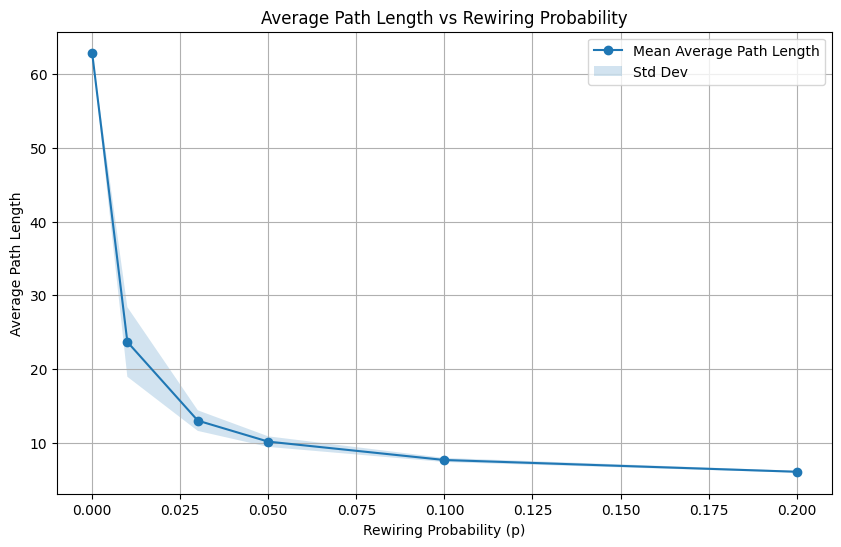

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(p_values, [means[p] for p in p_values], marker='o', label='Mean Average Path Length')
plt.fill_between(p_values, [means[p] - stds[p] for p in p_values], [means[p] + stds[p] for p in p_values], alpha=0.2, label='Std Dev')
plt.title('Average Path Length vs Rewiring Probability')
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Path Length')
plt.legend()
plt.grid()
plt.show()


<span style="color:#4DA6FF">

* **Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.**

The plot shows the average shortest path length $\langle d \rangle$ (with standard deviation as error bars) for Watts–Strogatz networks with $N = 500$ nodes, average degree $\langle k \rangle = 4$, and varying rewiring probability $p \in \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. The results demonstrate that the average path length drops sharply with just a small amount of rewiring ($p$), indicating that the small-world regime (high clustering and short average path lengths) emerges with only a few random “shortcuts.” The error bars highlight that variability in path length is larger at small $p$, but decreases as $p$ increases.

</span>


And from **Part 2**

* *BA Edition*.
  * **Note**: The second part of this exercise (after the questions to the text) first has you build a BA network step-by-step, but doesn't ask any questions. For that part, I would simply like you to write well-documented code that shows how you build the network. 


# Assignment 1.2: Stats and visualization of the Rock Music Network

This second part requires you to have built the network of Rock Musicians as described in the exercises for Week 4. You should complete the following exercise from **Part 2**.

<span style="color:#4DA6FF">

* ***Explain your process in words***

  * **First, simply describe the steps of the process (what you did, step by step)**
  * **Then, write a short section about which part of the process that was most difficult**
  * **Next write a short section about how you used LLMs to help you**
  * **Finally, compose a short section about what you would do differently if you had to do it again**

To develop the Rock Music Network, we first started by obtaining a text document containing the list of rock artists from Wikipedia. Then, from this document, we extracted all the artist names by looking for the wiki-links ([[...]]) so that we had a clean list of page titles. For each artist in the list, we used the Wikipedia API to download the raw wikitext of their page, and we saved each raw wikitext document in a folder. After this, for each document, we looked at its internal links. If any of this links matched an artist of the list of rock artists created in the first step, we recorded that connection. This resulted in a dictionary where each key was an artist and each value was the set of artists linked from that page. Finally, we used this dictionary to build a graph that represents the network of rock artists and their connections on Wikipedia.

The hardest part was extracting the wikitext from the Wikipedia API, as we didn't have experience with the API. But by reading the recommended links and asking LLMs we managed to solve this part easily. 

We used LLMs as a coding assistant. We first implemented the code ourselves for a single artist to make sure we understood the process. Once we had a working code, we asked an LLM to help us scale it to handle the whole list of artists.

Overall, we are happy with our approach. 

</span>



* *Simple network statistics and analysis*.

  * **Note related to this and the following exercise**. It is nice to have the dataset underlying the statistics and visualization available when we grade. Therefore, I recommend that you create a small *network dataset*, which is simply your graph stored in some format that you like (since it's only a few hundred nodes and a few thousand edges, it won't take up a lot of space). You can then place that network one of your group members' GitHub account (or some other server that's available online) and have your Jupyter Notebook fetch that dataset when it runs. (It's OK to use an LLM for help with setting this up, if it seems difficult). 


In [56]:
rock_network = nx.read_gexf("rock_network.gexf")

<span style="color:#4DA6FF">

* **What is the number of nodes in the network?**
* **More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)**



In [58]:
# number of nodes
print("Number of nodes:", rock_network.number_of_nodes())
# number of edges
print("Number of edges:", rock_network.number_of_edges())

Number of nodes: 477
Number of edges: 5969



<span style="color:#4DA6FF">

* **Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?**
    * **Compare the out-degree distribution to a *random network* with the same number of nodes and links.**
    * **Compare the in-degree distribution to a *scale-free* network with the same number of nodes.**


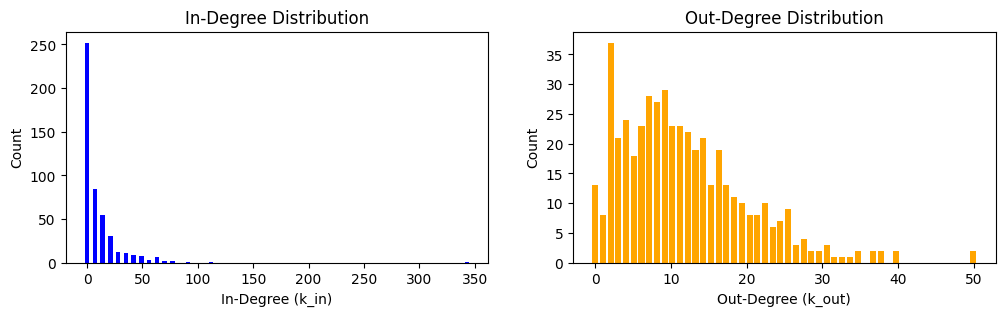

In [60]:
# In-degree distribution
in_degrees = [d for n, d in rock_network.in_degree()]
hist_in = np.histogram(in_degrees, bins=50)

# Out-degree distribution
out_degrees = [d for n, d in rock_network.out_degree()]
hist_out = np.histogram(out_degrees, bins=50)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.bar(hist_in[1][:-1], hist_in[0], color='blue', width=4)
plt.title("In-Degree Distribution")
plt.xlabel("In-Degree (k_in)")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.bar(hist_out[1][:-1], hist_out[0], color='orange')
plt.title("Out-Degree Distribution")
plt.xlabel("Out-Degree (k_out)")
plt.ylabel("Count")

plt.show()

<span style="color:#4DA6FF">

jj


<span style="color:#4DA6FF">

* **Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?**


In [62]:
# Top 5 by in-degree
top_in = sorted(rock_network.in_degree(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 performers by in-degree (most referenced by others):")
for artist, deg in top_in:
    print(f"{artist}: {deg}")

# Top 5 by out-degree
top_out = sorted(rock_network.out_degree(), key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 performers by out-degree (most references to others):")
for artist, deg in top_out:
    print(f"{artist}: {deg}")

Top 5 performers by in-degree (most referenced by others):
AllMusic: 350
Led Zeppelin: 118
Bob Dylan: 94
David Bowie: 81
Metallica: 79

Top 5 performers by out-degree (most references to others):
Alice in Chains: 51
Deep Purple: 51
Bryan Adams: 40
Black Sabbath: 40
Def Leppard: 38



<span style="color:#4DA6FF">

* **What are the 10 pages with the longest wiki entries? (use the `length of content` attribute to figure this one out)?**

</span>

In [64]:
# Get all nodes with their word counts
word_counts = [(node, data.get('word_count', 0)) for node, data in rock_network.nodes(data=True)]

# Sort by word count descending
top_10_longest = sorted(word_counts, key=lambda x: x[1], reverse=True)[:10]

print("Top 10 pages with the longest wiki entries:")
for artist, count in top_10_longest:
    print(f"{artist}: {count} words")

Top 10 pages with the longest wiki entries:
Guns N' Roses: 60850 words
Coldplay: 47026 words
Queen (band): 46175 words
Marilyn Manson (band): 46032 words
The Rolling Stones: 44022 words
U2: 43048 words
Bob Dylan: 42510 words
David Bowie: 42415 words
Paul McCartney: 42407 words
Elton John: 41255 words



And the following exercise from **Part 3**

* *Let's build a simple visualization of the network*

And that's it! You're all set.